# Feature_Engineering Exercises
Do your work for this exercise in a jupyter notebook named ```feature_engineering``` within the ```regression-exercises``` repo. Add, commit, and push your work.

In [1]:
# standardized modules
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#import dataset
from pydataset import data

# Decision Tree, Model & Feature Evaluation Imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

# needed for scaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

#my modules
import QMCBT_wrangle as w
import QMCBT_explore_evaluate as ee
#import QMCBT_[00]quick_tips as tips
#import QMCBT_[01]acquire as acquire
#import QMCBT_[02]prepare as prepare
#import QMCBT_[03]explore as explore
#import QMCBT_[04]evaluate as evaluate

# 1. Load the tips dataset.

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<div class="alert alert-warning">


## Check WhiteSpace
    
</div>

In [5]:
# Return (row count)
row_count = df.shape[0]
row_count

244

In [6]:
# creates list of columns
column_list = df.columns
column_list

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [7]:
# returns count of all rows from each column that has values
# essentially skipping count on any row that has a column with whitespace
row_value_count = df[column_list].value_counts().sum()
row_value_count

244

In [8]:
# subtract value count from row count to get count of rows with whitespace
whitespace_count = row_count - row_value_count
whitespace_count

0

In [9]:
# make a function

def check_whitespace(df):
    row_count = df.shape[0]
    column_list = df.columns
    row_value_count = df[column_list].value_counts().sum()
    whitespace_count = row_count - row_value_count
    return whitespace_count

In [10]:
check_whitespace(df)

0

In [11]:
# make the function better

def check_whitespace(df):
    """
    This Function checks the DataFrame argument for whitespace,
    replaces any that exist with NaN, then returns report.
    
    Imports Needed:
    import numpy as np
    """
    
    row_count = df.shape[0]
    column_list = df.columns
    row_value_count = df[column_list].value_counts().sum()
    whitespace_count = row_count - row_value_count
    
    if whitespace_count > 0:
        df = df.replace(r'^\s*$', np.NaN, regex=True)
        print(f'There were {whitespace_count} Whitespace characters found and replaced with NULL/NaN.')

    else:
        print(f'There were {whitespace_count} Whitespace characters found.')

    return df.isnull().sum()

In [12]:
check_whitespace(df)

There were 0 Whitespace characters found.


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<div class="alert alert-warning">


## Convert Categorical
* sex
* smoker
* day
* time
    
</div>

In [13]:
df.sex.unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [14]:
df.smoker.unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [15]:
df.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [16]:
df.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [17]:
df.sex = df.sex.replace('Male', 1)
df.sex = df.sex.replace('Female', 0)

df.smoker = df.smoker.replace('Yes', 1)
df.smoker = df.smoker.replace('No', 0)

df.time = df.time.replace('Dinner', 1)
df.time = df.time.replace('Lunch', 0)

In [18]:
df.head().T

,0,1,2,3,4
total_bill,16.99,10.34,21.01,23.68,24.59
tip,1.01,1.66,3.5,3.31,3.61
sex,0,1,1,1,0
smoker,0,0,0,0,0
day,Sun,Sun,Sun,Sun,Sun
time,1,1,1,1,1
size,2,3,3,2,4


<div class="alert alert-warning">

    
## Get Dummies

In [19]:
dummy_df = pd.get_dummies(data=df[['day']], drop_first=False)
dummy_df.T

,0,1,2,3,4,5,6,7,8,9,...,234,235,236,237,238,239,240,241,242,243
day_Thur,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
day_Fri,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
day_Sat,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
day_Sun,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df = pd.concat([df, dummy_df], axis=1)

<div class="alert alert-warning">

    
## Rename Columns

In [21]:
df = df.rename(columns={"size": "party_size", "sex": "male_female", "time": "dinner_lunch"})

<div class="alert alert-warning">

    
## Drop Columns

In [22]:
df = df.drop(columns=['day'])

In [23]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,234,235,236,237,238,239,240,241,242,243
total_bill,16.99,10.34,21.01,23.68,24.59,25.29,8.77,26.88,15.04,14.78,...,15.53,10.07,12.6,32.83,35.83,29.03,27.18,22.67,17.82,18.78
tip,1.01,1.66,3.50,3.31,3.61,4.71,2.00,3.12,1.96,3.23,...,3.00,1.25,1.0,1.17,4.67,5.92,2.00,2.00,1.75,3.00
male_female,0.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.0,1.00,0.00,1.00,0.00,1.00,1.00,0.00
smoker,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.0,1.00,0.00,0.00,1.00,1.00,0.00,0.00
dinner_lunch,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00
party_size,2.00,3.00,3.00,2.00,4.00,4.00,2.00,4.00,2.00,2.00,...,2.00,2.00,2.0,2.00,3.00,3.00,2.00,2.00,2.00,2.00
day_Thur,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00
day_Fri,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
day_Sat,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,0.00
day_Sun,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   total_bill    244 non-null    float64 
 1   tip           244 non-null    float64 
 2   male_female   244 non-null    category
 3   smoker        244 non-null    category
 4   dinner_lunch  244 non-null    category
 5   party_size    244 non-null    int64   
 6   day_Thur      244 non-null    uint8   
 7   day_Fri       244 non-null    uint8   
 8   day_Sat       244 non-null    uint8   
 9   day_Sun       244 non-null    uint8   
dtypes: category(3), float64(2), int64(1), uint8(4)
memory usage: 7.9 KB


<div class="alert alert-warning">

    
## Change dtype

In [25]:
df = df.astype({"male_female": int, "smoker": int, "dinner_lunch": int})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_bill    244 non-null    float64
 1   tip           244 non-null    float64
 2   male_female   244 non-null    int64  
 3   smoker        244 non-null    int64  
 4   dinner_lunch  244 non-null    int64  
 5   party_size    244 non-null    int64  
 6   day_Thur      244 non-null    uint8  
 7   day_Fri       244 non-null    uint8  
 8   day_Sat       244 non-null    uint8  
 9   day_Sun       244 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 12.5 KB


* ## a. Create a column named ```price_per_person```. This should be the ```total bill``` divided by the ```party size```.

#### Feature Engineer

In [27]:
# Create price_per_person feature
df['price_per_person'] = round((df.total_bill / df.party_size), 2)
df

,total_bill,tip,male_female,smoker,dinner_lunch,party_size,day_Thur,day_Fri,day_Sat,day_Sun,price_per_person
0,16.99,1.01,0,0,1,2,0,0,0,1,8.49
1,10.34,1.66,1,0,1,3,0,0,0,1,3.45
2,21.01,3.50,1,0,1,3,0,0,0,1,7.00
3,23.68,3.31,1,0,1,2,0,0,0,1,11.84
4,24.59,3.61,0,0,1,4,0,0,0,1,6.15
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,3,0,0,1,0,9.68
240,27.18,2.00,0,1,1,2,0,0,1,0,13.59
241,22.67,2.00,1,1,1,2,0,0,1,0,11.34
242,17.82,1.75,1,0,1,2,0,0,1,0,8.91


* ## b. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the ```tip amount```?

<div class="alert alert-info">


### ANSWER:
* ### sex and party_size

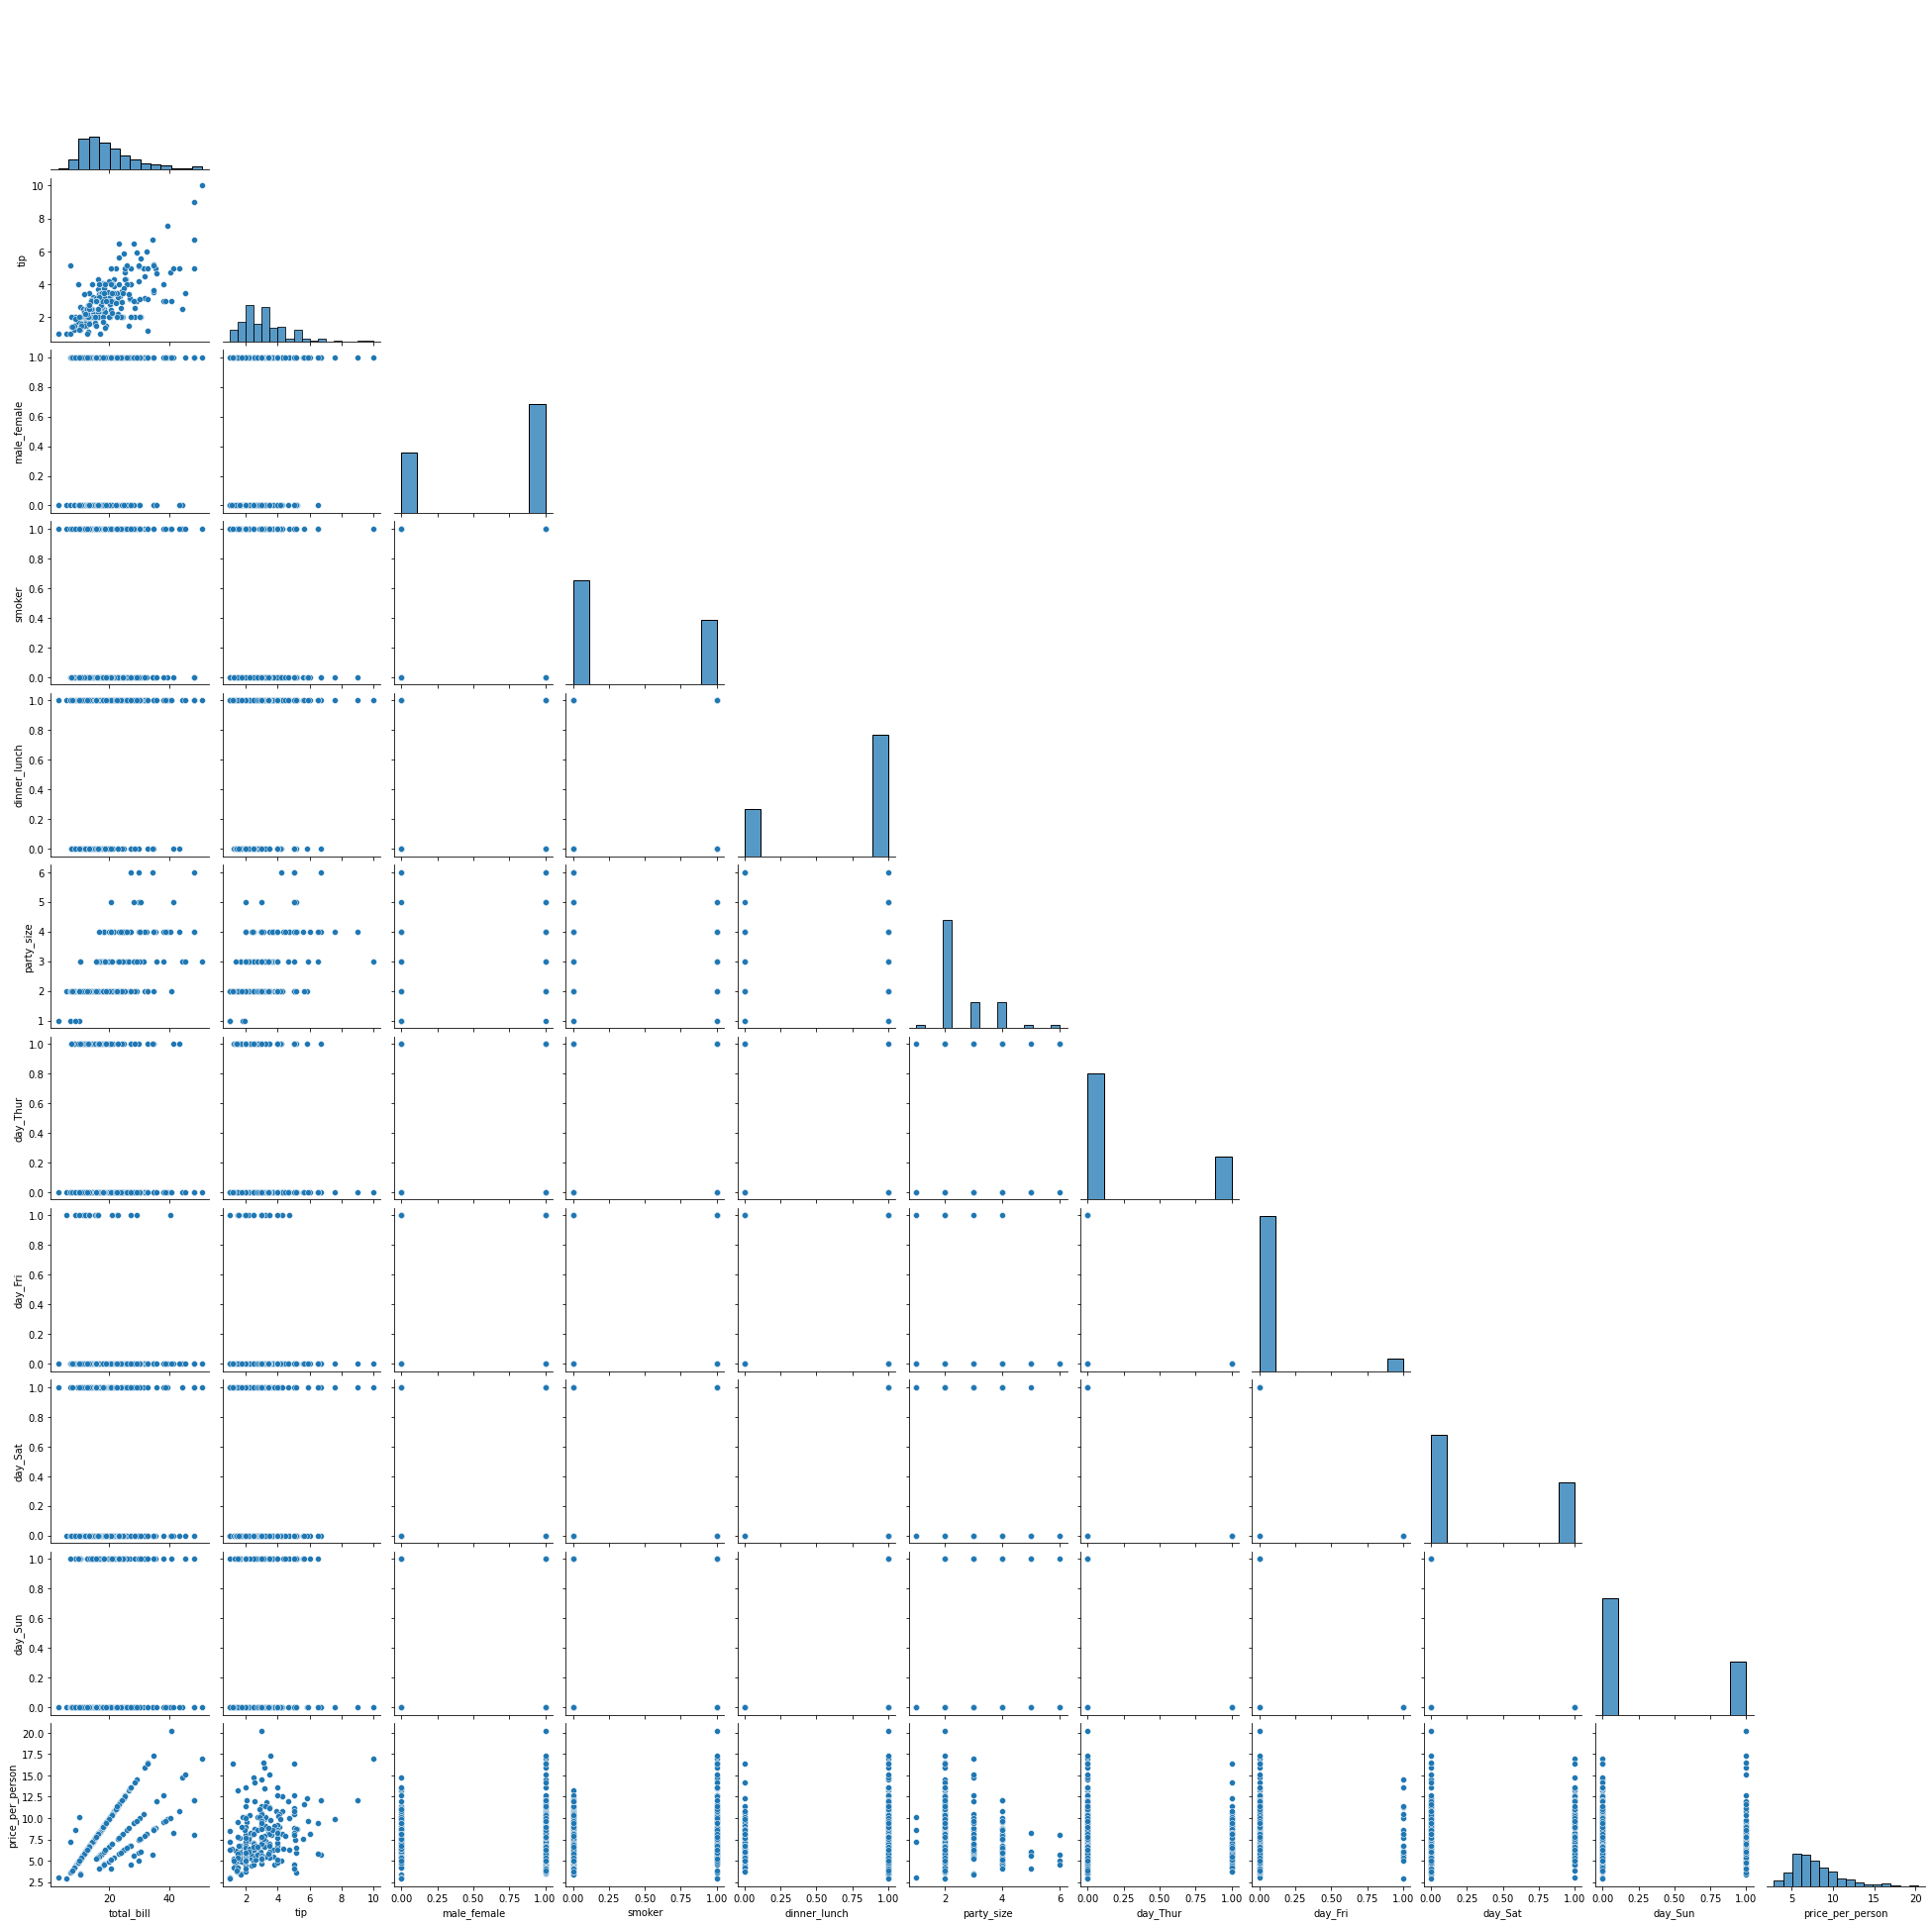

In [28]:
# PairPlot
sns.pairplot(data=df, corner=True)

In [29]:
df.corr()

,total_bill,tip,male_female,smoker,dinner_lunch,party_size,day_Thur,day_Fri,day_Sat,day_Sun,price_per_person
total_bill,1.000000,0.675734,0.144877,0.085721,0.183118,0.598315,-0.138174,-0.086168,0.054919,0.122953,0.647554
tip,0.675734,1.000000,0.088862,0.005929,0.121629,0.489299,-0.095879,-0.055463,-0.002790,0.125114,0.347405
male_female,0.144877,0.088862,1.000000,0.002816,0.205231,0.086195,-0.194445,-0.071060,0.053957,0.168106,0.108485
smoker,0.085721,0.005929,0.002816,1.000000,0.054921,-0.133178,-0.128534,0.244316,0.155744,-0.181624,0.229916
dinner_lunch,0.183118,0.121629,0.205231,0.054921,1.000000,0.103411,-0.917996,-0.058159,0.462709,0.418071,0.122258
party_size,0.598315,0.489299,0.086195,-0.133178,0.103411,1.000000,-0.072598,-0.142184,-0.041121,0.193054,-0.175359
day_Thur,-0.138174,-0.095879,-0.194445,-0.128534,-0.917996,-0.072598,1.000000,-0.169608,-0.434480,-0.392566,-0.093121
day_Fri,-0.086168,-0.055463,-0.071060,0.244316,-0.058159,-0.142184,-0.169608,1.000000,-0.216319,-0.195451,0.024477
day_Sat,0.054919,-0.002790,0.053957,0.155744,0.462709,-0.041121,-0.434480,-0.216319,1.000000,-0.500682,0.076427
day_Sun,0.122953,0.125114,0.168106,-0.181624,0.418071,0.193054,-0.392566,-0.195451,-0.500682,1.000000,-0.005669


* ## c. Use ```select k best``` to select the top 2 features for predicting ```tip amount```. What are they?

In [30]:
train, validate, test = w.split(df)

________________________________________________________________
|                              DF                              |
|--------------------:--------------------:--------------------|
|        Train       |      Validate      |        Test        |
:--------------------------------------------------------------:


Prepared df: (244, 11)

      Train: (146, 11) - 60.0%
   Validate: (49, 11) - 20.0%
       Test: (49, 11) - 20.0%


In [31]:
train.head().T

,0,1,2,3,4
total_bill,23.33,16.32,18.64,14.15,15.42
tip,5.65,4.30,1.36,2.00,1.57
male_female,1.00,0.00,0.00,0.00,1.00
smoker,1.00,1.00,0.00,0.00,0.00
dinner_lunch,1.00,1.00,0.00,0.00,1.00
party_size,2.00,2.00,3.00,2.00,2.00
day_Thur,0.00,0.00,1.00,1.00,0.00
day_Fri,0.00,1.00,0.00,0.00,0.00
day_Sat,0.00,0.00,0.00,0.00,0.00
day_Sun,1.00,0.00,0.00,0.00,1.00


In [32]:
cols = train.columns
cols

Index(['total_bill', 'tip', 'male_female', 'smoker', 'dinner_lunch',
       'party_size', 'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun',
       'price_per_person'],
      dtype='object')

In [33]:
feature_cols = ['total_bill',
                'male_female',
                'smoker', 
                'dinner_lunch',
                'party_size', 
                'price_per_person', 
                'day_Thur', 
                'day_Fri', 
                'day_Sat',
                'day_Sun']

target = 'tip'

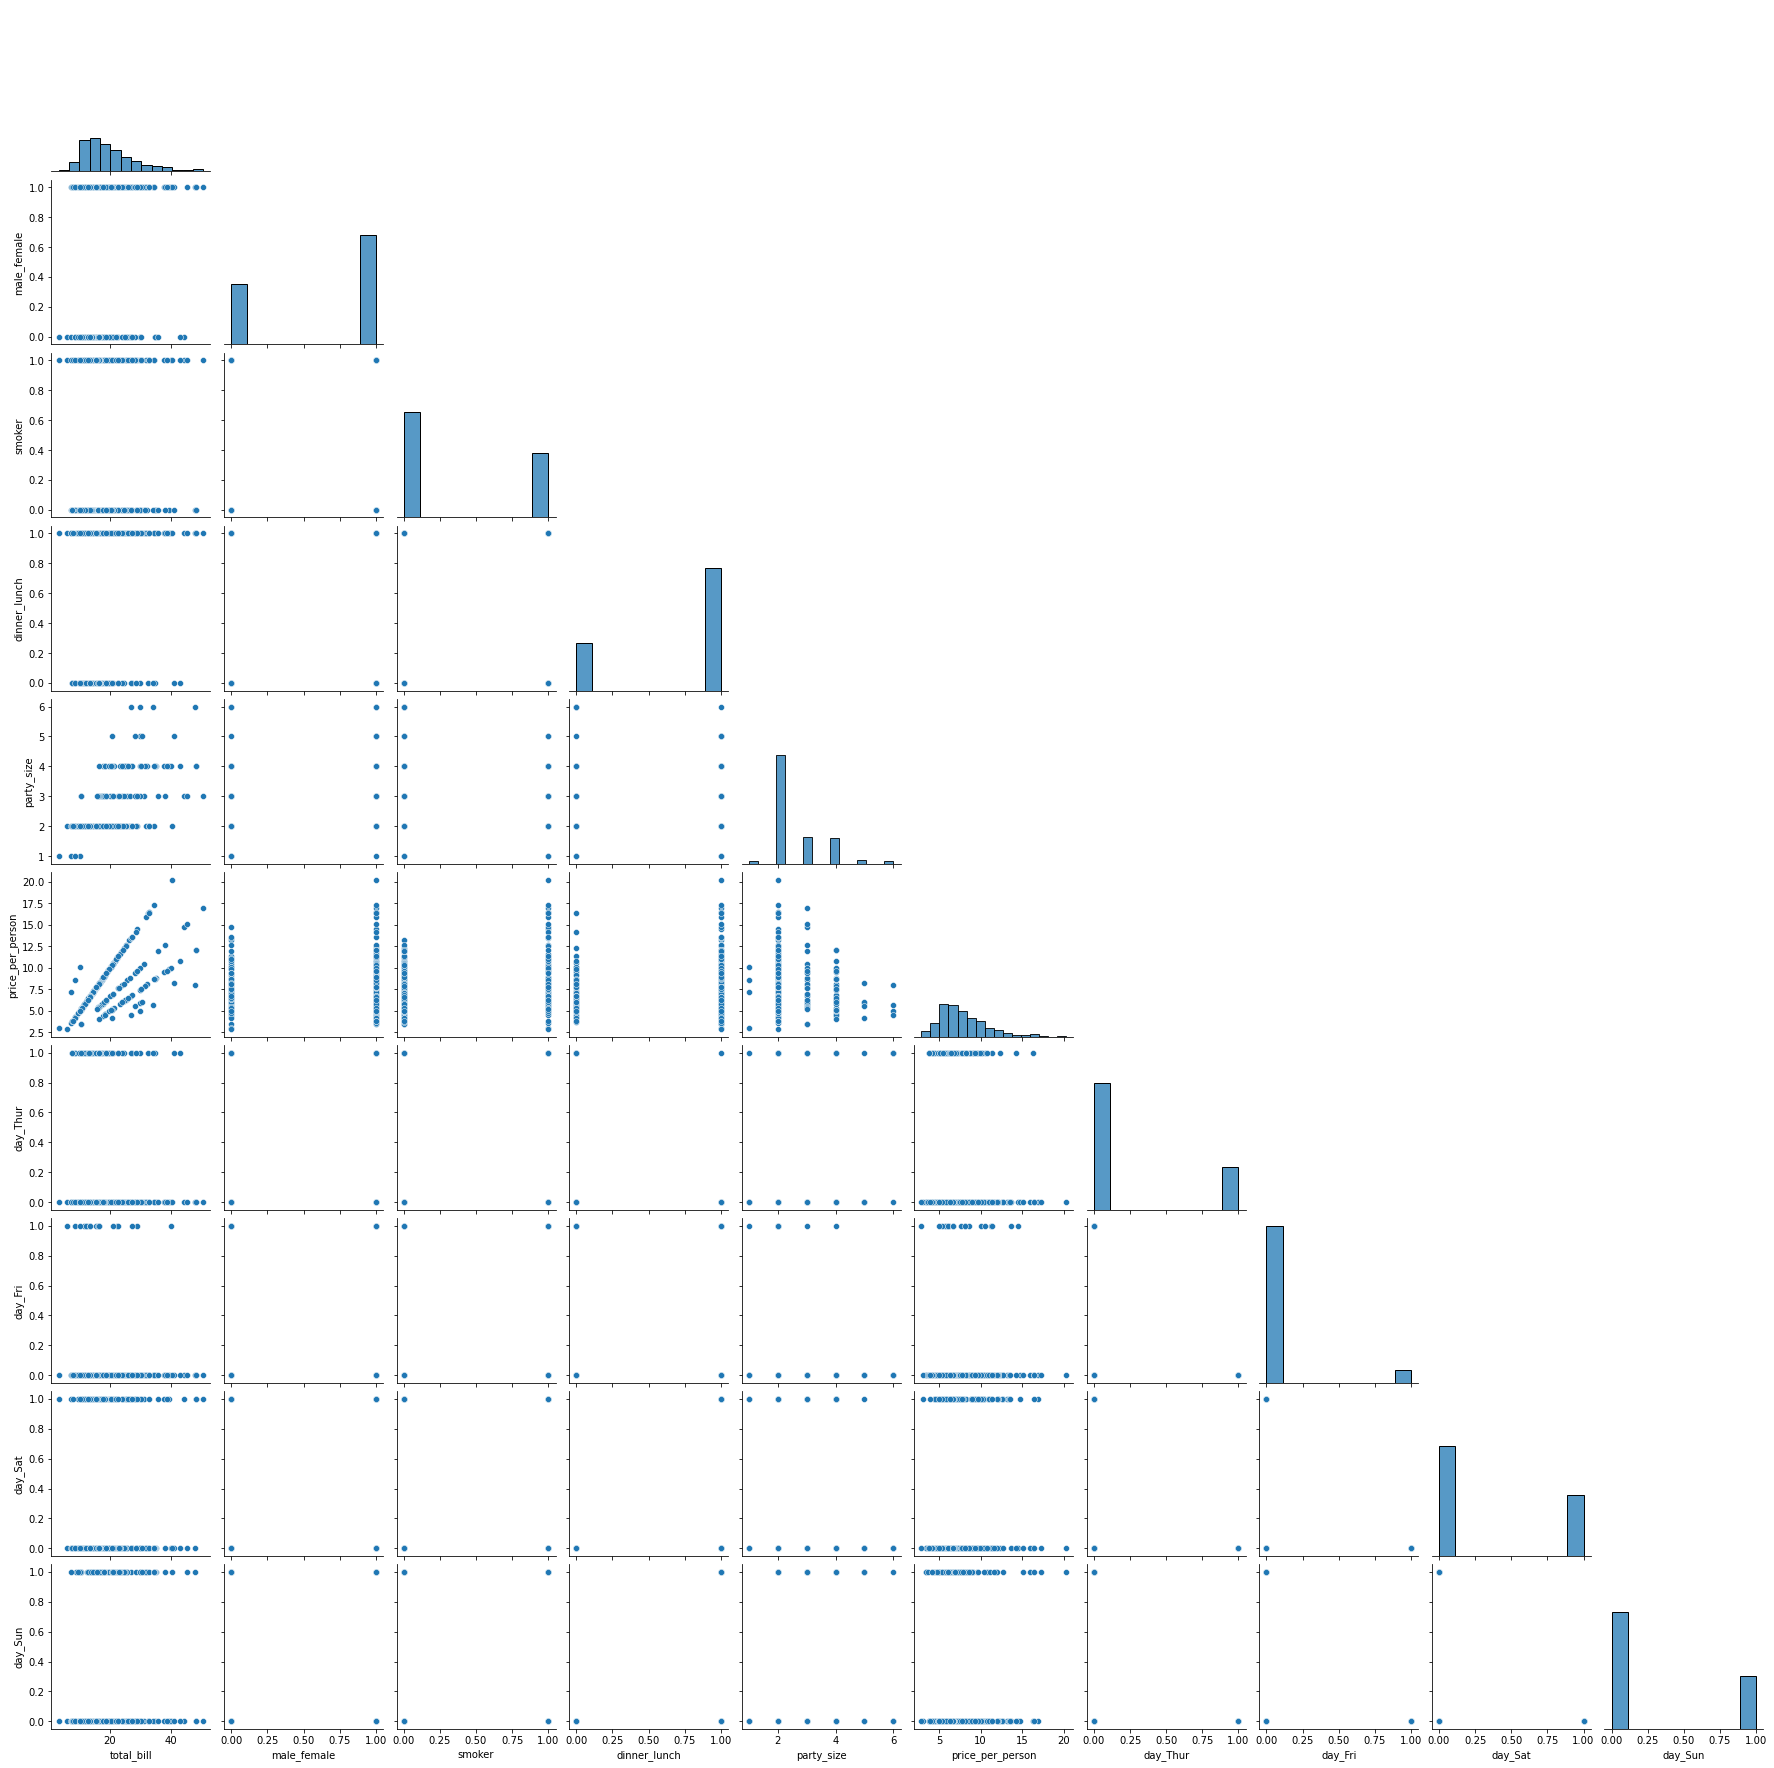

In [34]:
# PairPlot
sns.pairplot(data=df[feature_cols], corner = True)

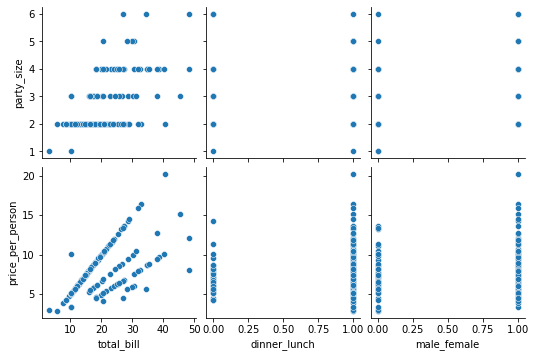

In [35]:
sns.pairplot(
    train,
    x_vars=["total_bill", "dinner_lunch", "male_female"],
    y_vars=["party_size", "price_per_person"],
)

In [36]:
# run Xy split from wrangle
# last line outputs copy paste code until I can figure out how to read in train, val, test
w.Xy_split(feature_cols, target)

_______________________________________________________________
|                              DF                             |
|-------------------:-------------------:---------------------|
|       Train       |       Validate    |          Test       |
|-------------------:-------------------:---------------------|
| x_train | y_train |   x_val  |  y_val |   x_test  |  y_test |
:-------------------------------------------------------------:

* 1. tree_1 = DecisionTreeClassifier(max_depth = 5)
* 2. tree_1.fit(x_train, y_train)
* 3. predictions = tree_1.predict(x_train)
* 4. pd.crosstab(y_train, y_preds)
* 5. val_predictions = tree_1.predict(x_val)
* 6. pd.crosstab(y_val, y_preds)


:------------------------------:
|Copy, Paste, and Run this code|
:------------------------------:

X_train, y_train = train[feature_cols], train[target]
X_validate, y_validate = validate[feature_cols], validate[target]
X_test, y_test = test[feature_cols], test[target]
X_train.head().T


In [37]:
# code from above function copy pasted in to allow for uninterupted run of workbook
X_train, y_train = train[feature_cols], train[target]
X_validate, y_validate = validate[feature_cols], validate[target]
X_test, y_test = test[feature_cols], test[target]
X_train.head().T

,0,1,2,3,4
total_bill,23.33,16.32,18.64,14.15,15.42
male_female,1.00,0.00,0.00,0.00,1.00
smoker,1.00,1.00,0.00,0.00,0.00
dinner_lunch,1.00,1.00,0.00,0.00,1.00
party_size,2.00,2.00,3.00,2.00,2.00
price_per_person,11.66,8.16,6.21,7.08,7.71
day_Thur,0.00,0.00,1.00,1.00,0.00
day_Fri,0.00,1.00,0.00,0.00,0.00
day_Sat,0.00,0.00,0.00,0.00,0.00
day_Sun,1.00,0.00,0.00,0.00,1.00


<div class="alert alert-warning">


## Select K Best

- looks at each feature in isolation against the target based on correlation
- fastest of all approaches covered in this lesson
- doesn't consider feature interactions
- After fitting: `.scores_`, `.pvalues_`, `.get_support()`, and `.transform`

In [38]:
# make the thing
kbest = SelectKBest(f_regression, k=2)
# fit the thing
_ = kbest.fit(X_train, y_train)

In [39]:
# statistical f-value:
kbest.scores_
#p value: 
kbest.pvalues_

array([1.50592117e-16, 1.94705239e-01, 4.08889909e-01, 1.30330476e-01,
       4.09415406e-13, 1.65905928e-02, 2.08021754e-01, 9.55202509e-01,
       3.09523547e-02, 9.80962486e-04])

In [40]:
kbest_results = pd.DataFrame(
    dict(p=kbest.pvalues_, f=kbest.scores_),
                             index = X_train.columns)

In [41]:
kbest_results

,p,f
total_bill,1.505921e-16,87.537608
male_female,1.947052e-01,1.697421
smoker,4.088899e-01,0.686026
dinner_lunch,1.303305e-01,2.314923
party_size,4.094154e-13,63.743687
price_per_person,1.659059e-02,5.875783
day_Thur,2.080218e-01,1.599467
day_Fri,9.552025e-01,0.003167
day_Sat,3.095235e-02,4.748361
day_Sun,9.809625e-04,11.323902


In [42]:
# get-support() will output a boolean mask to tell me which features were selected
# we can apply this mask to the columns in our original dataframe
X_train.columns[kbest.get_support()]

Index(['total_bill', 'party_size'], dtype='object')

In [43]:
# kbest transform will convert our information to the selected feature subspace
# ****buuuuuut, its just a numpy array
kbest.transform(X_train)[:5]

array([[23.33,  2.  ],
       [16.32,  2.  ],
       [18.64,  3.  ],
       [14.15,  2.  ],
       [15.42,  2.  ]])

In [44]:
X_train_transformed = pd.DataFrame(kbest.transform(X_train),
                                   columns=X_train.columns[kbest.get_support()],
                                   index=X_train.index)

In [45]:
X_train_transformed.T

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
total_bill,23.33,16.32,18.64,14.15,15.42,13.81,32.83,30.4,25.29,12.76,...,48.17,20.65,38.07,31.71,23.68,8.51,14.83,10.33,21.01,16.45
party_size,2.00,2.00,3.00,2.00,2.00,2.00,2.00,4.0,4.00,2.00,...,6.00,3.00,3.00,4.00,2.00,2.00,2.00,3.00,2.00,2.00


In [46]:
feature_cols

['total_bill',
 'male_female',
 'smoker',
 'dinner_lunch',
 'party_size',
 'price_per_person',
 'day_Thur',
 'day_Fri',
 'day_Sat',
 'day_Sun']

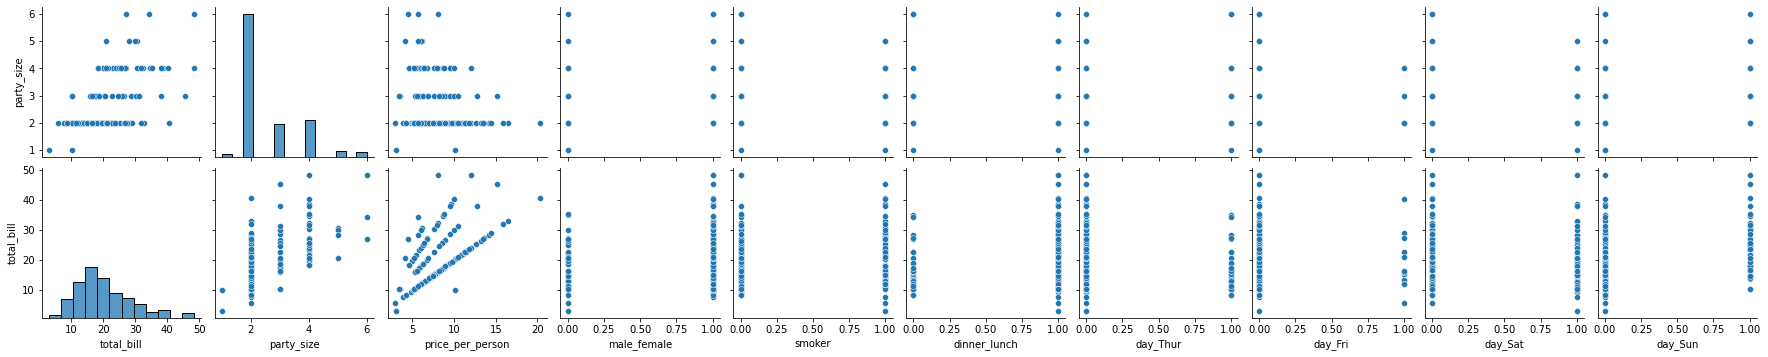

In [47]:
sns.pairplot(
    train,
    x_vars=['total_bill',
 'party_size',
 'price_per_person',
 'male_female',
 'smoker',
 'dinner_lunch',
 'day_Thur',
 'day_Fri',
 'day_Sat',
 'day_Sun'],
    y_vars=["party_size","total_bill"],
)

<div class="alert alert-info">


## ANSWER:
* total_bill & party_size
* Consider engineering features for tip_percent and tip_per_person

* ## d. Use ```recursive feature elimination``` to select the top 2 features for ```tip amount```. What are they?

<div class="alert alert-warning">


## RFE

- Recursive Feature Elimination
- Progressively eliminate features based on importance to the model
- Requires a model with either a `.coef_` or `.feature_importances_` property
- After fitting: `.ranking_`, `.get_support()`, and `.transform()`

In [48]:
# make a model object to use in RFE process.
# The model is here to give us metrics on feature importance and model score
# allowing us to recursively reduce the number of features to reach our desired space
model = LinearRegression()

In [49]:
# make thing
rfe = RFE(model, n_features_to_select=2)
# fit thing
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [50]:
rfe.ranking_

array([7, 6, 5, 1, 1, 4, 9, 3, 2, 8])

In [51]:
pd.DataFrame({'rfe_ranking': rfe.ranking_}, index = X_train.columns)

,rfe_ranking
total_bill,7
male_female,6
smoker,5
dinner_lunch,1
party_size,1
price_per_person,4
day_Thur,9
day_Fri,3
day_Sat,2
day_Sun,8


In [52]:
rfe.get_support()

array([False, False, False,  True,  True, False, False, False, False,
       False])

In [53]:
X_train_transformed = pd.DataFrame(rfe.transform(X_train),
                                   index = X_train.index,
                                   columns = X_train.columns[rfe.support_])

In [54]:
X_train_transformed.head()

,dinner_lunch,party_size
0,1.0,2.0
1,1.0,2.0
2,0.0,3.0
3,0.0,2.0
4,1.0,2.0


<div class="alert alert-info">


## ANSWER:
* dinner_lunch & party_size

* ## e. Why do you think ```select k best``` and ```recursive feature elimination``` might give different answers for the top features? Does this change as you change the number of features you are selecting?

<div class="alert alert-info">


# ANSWER: 🤷‍♂️
* They continue to choose different features as you increase the feature count
* They are consistent with their initial two choices
    
    
* K Best does not take into account Correlation
* RFE does

# 2. Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [55]:
# create function

def select_kbest(X, y, k=2):
    """
    Select K Best
    - looks at each feature in isolation against the target based on correlation
    - fastest of all approaches covered in this lesson
    - doesn't consider feature interactions
    - After fitting: `.scores_`, `.pvalues_`, `.get_support()`, and `.transform`
    
    Imports needed:
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_regression
    
    Arguments taken:
    X = predictors
    y = target
    k = number of features to select
    """
    
    kbest = SelectKBest(f_regression, k=k)
    _ = kbest.fit(X, y)
    
    X_transformed = pd.DataFrame(kbest.transform(X),
                                   columns = X.columns[kbest.get_support()],
                                   index = X.index)
    
    return X_transformed.head().T

In [56]:
ee.select_kbest(X_train, y_train, 2)

,total_bill,party_size
0,23.33,2.0
1,16.32,2.0
2,18.64,3.0
3,14.15,2.0
4,15.42,2.0


# 3. Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [57]:
def rfe(X, y, k=2):
    """
    RFE

    - Recursive Feature Elimination
    - Progressively eliminate features based on importance to the model
    - Requires a model with either a `.coef_` or `.feature_importances_` property
    - After fitting: `.ranking_`, `.get_support()`, and `.transform()`
    
    Imports Needed:
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LinearRegression
    
    Arguments taken:
    X = predictors
    y = target
    k = number of features to select
    """
    
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=k)
    rfe.fit(X, y)
    
    X_transformed = pd.DataFrame(rfe.transform(X),
                                 index = X.index,
                                 columns = X.columns[rfe.support_])
    
    return X_transformed.head()

In [58]:
ee.rfe(X_train, y_train, k=2)

,dinner_lunch,party_size
0,1.0,2.0
1,1.0,2.0
2,0.0,3.0
3,0.0,2.0
4,1.0,2.0


<div class="alert alert-warning">


## Sequential Feature Selector

- progressively adds features based on cross validated model performance
- forwards: start with 0, add the best additional feature until you have the desired number
- backwards: start with all features, remove the worst performing until you have the desired number
- After fitting: `.support_`, `.transform`

In [59]:
model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=2)
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=2)

In [60]:
X_train_transformed = pd.DataFrame(
sfs.transform(X_train),
index = X_train.index,
columns = X_train.columns[sfs.support_])

In [61]:
X_train_transformed

,total_bill,party_size
0,23.33,2.0
1,16.32,2.0
2,18.64,3.0
3,14.15,2.0
4,15.42,2.0
5,13.81,2.0
6,32.83,2.0
7,30.40,4.0
8,25.29,4.0
9,12.76,2.0


In [62]:
def sfs(X, y, k=2):
    """
    Sequential Feature Selector
    
    - progressively adds features based on cross validated model performance
    - forwards: start with 0, add the best additional feature until you have the desired number
    - backwards: start with all features, remove the worst performing until you have the desired number
    - After fitting: `.support_`, `.transform`
    
    Imports Needed:
    from sklearn.feature_selection import SequentialFeatureSelector
    
    Arguments taken:
    X = predictors
    y = target
    k = number of features to select
    """
    
    model = LinearRegression()
    sfs = SequentialFeatureSelector(model, n_features_to_select=k)
    sfs.fit(X, y)
    
    X_transformed = pd.DataFrame(sfs.transform(X),
                                 index = X.index,
                                 columns = X.columns[sfs.support_])
    
    return X_transformed.head()

In [63]:
ee.sfs(X_train, y_train, 2)

,total_bill,party_size
0,23.33,2.0
1,16.32,2.0
2,18.64,3.0
3,14.15,2.0
4,15.42,2.0


# 4. Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).

In [64]:
swiss_df = data('swiss')
swiss_df.T

,Courtelary,Delemont,Franches-Mnt,Moutier,Neuveville,Porrentruy,Broye,Glane,Gruyere,Sarine,...,Sion,Boudry,La Chauxdfnd,Le Locle,Neuchatel,Val de Ruz,ValdeTravers,V. De Geneve,Rive Droite,Rive Gauche
Fertility,80.20,83.10,92.5,85.80,76.90,76.10,83.80,92.40,82.40,82.90,...,79.30,70.40,65.70,72.70,64.40,77.60,67.60,35.00,44.70,42.80
Agriculture,17.00,45.10,39.7,36.50,43.50,35.30,70.20,67.80,53.30,45.20,...,63.10,38.40,7.70,16.70,17.60,37.60,18.70,1.20,46.60,27.70
Examination,15.00,6.00,5.0,12.00,17.00,9.00,16.00,14.00,12.00,16.00,...,13.00,26.00,29.00,22.00,35.00,15.00,25.00,37.00,16.00,22.00
Education,12.00,9.00,5.0,7.00,15.00,7.00,7.00,8.00,7.00,13.00,...,13.00,12.00,11.00,13.00,32.00,7.00,7.00,53.00,29.00,29.00
Catholic,9.96,84.84,93.4,33.77,5.16,90.57,92.85,97.16,97.67,91.38,...,96.83,5.62,13.79,11.22,16.92,4.97,8.65,42.34,50.43,58.33
Infant.Mortality,22.20,22.20,20.2,20.30,20.60,26.60,23.60,24.90,21.00,24.40,...,18.10,20.30,20.50,18.90,23.00,20.00,19.50,18.00,18.20,19.30


In [65]:
swiss_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 3.6+ KB


In [66]:
swiss_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Fertility,47.0,70.142553,12.491697,35.00,64.700,70.40,78.450,92.5
Agriculture,47.0,50.659574,22.711218,1.20,35.900,54.10,67.650,89.7
Examination,47.0,16.489362,7.977883,3.00,12.000,16.00,22.000,37.0
Education,47.0,10.978723,9.615407,1.00,6.000,8.00,12.000,53.0
Catholic,47.0,41.143830,41.704850,2.15,5.195,15.14,93.125,100.0
Infant.Mortality,47.0,19.942553,2.912697,10.80,18.150,20.00,21.700,26.6


In [67]:
ee.check_whitespace(swiss_df)

There were 0 Whitespace characters found.
NULL/NaN report:


Fertility           0
Agriculture         0
Examination         0
Education           0
Catholic            0
Infant.Mortality    0
dtype: int64

In [68]:
# Assign everything to X except Fertility
X = swiss_df.drop(columns=['Fertility'])

# Assign Target and y
target = swiss_df['Fertility']
y = target

In [69]:
# Select K Best
ee.select_kbest(X, y, 2)

,Examination,Education
Courtelary,15.0,12.0
Delemont,6.0,9.0
Franches-Mnt,5.0,5.0
Moutier,12.0,7.0
Neuveville,17.0,15.0


In [70]:
# Recursive Feature Elimination (RFE)
ee.rfe(X, y, 2)

,Education,Infant.Mortality
Courtelary,12.0,22.2
Delemont,9.0,22.2
Franches-Mnt,5.0,20.2
Moutier,7.0,20.3
Neuveville,15.0,20.6


In [71]:
# Sequential Feature Selector (SFS)
ee.sfs(X, y, 2)

,Examination,Infant.Mortality
Courtelary,15.0,22.2
Delemont,6.0,22.2
Franches-Mnt,5.0,20.2
Moutier,12.0,20.3
Neuveville,17.0,20.6


In [72]:
feature_cols = ['Examination', 'Education', 'Infant.Mortality']

In [73]:
train, validate, test = w.split(swiss_df)

________________________________________________________________
|                              DF                              |
|--------------------:--------------------:--------------------|
|        Train       |      Validate      |        Test        |
:--------------------------------------------------------------:


Prepared df: (47, 6)

      Train: (27, 6) - 56.99999999999999%
   Validate: (10, 6) - 21.0%
       Test: (10, 6) - 21.0%


In [74]:
columns_to_scale = feature_cols

In [75]:
w.scale_data(train, validate, test, columns_to_scale, scaler=MinMaxScaler(), return_scaler = False)

(    Fertility  Agriculture  Examination  Education  Catholic  Infant.Mortality
 0        66.9         67.5     0.323529   0.098039      2.27          0.347826
 1        87.1         64.5     0.323529   0.078431     98.61          0.817391
 2        82.4         53.3     0.264706   0.098039     97.67          0.513043
 3        76.9         43.5     0.411765   0.254902      5.16          0.478261
 4        58.3         26.8     0.647059   0.333333     18.46          0.504348
 5        65.4         49.5     0.352941   0.117647      6.10          0.643478
 6        79.4         64.9     0.117647   0.019608     98.22          0.443478
 7        92.4         67.8     0.323529   0.117647     97.16          0.852174
 8        75.5         85.9     0.000000   0.000000     99.71          0.000000
 9        56.6         50.9     0.558824   0.196078     15.14          0.139130
 10       55.7         19.4     0.676471   0.509804     12.11          0.443478
 11       77.6         37.6     0.352941

<div class="alert alert-danger">


# QUESTION: 🤷‍♂️
* Target cannot be continuous
* WHY?
* Do I need to convert Target to Discreat before running Xy_split
* What would that look like?
    * fertility_success
    * True > 89.5
    * False <= 89.49 